# Datos

In [1]:
#paquetes locales diseñados para nuestro caso de estudio
from localpacks.data import get_data 

#API maps
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon

#draw map streets
import osmnx as ox
import geopandas

#graficos
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

### Inpeccionamos nuestros datos

In [2]:
cordoba_sf = get_data() #obtenemos nuestros datos

In [3]:
cordoba_sf.head(3)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,"POLYGON ((3686668.391348725 6672098.301358264,..."
1,336421,141470304,211.0,223.0,434.0,125.0,318.0,121.0,"POLYGON ((3651995.370083685 6492136.442240674,..."
2,336420,141470302,203.0,168.0,371.0,105.0,117.0,44.0,"POLYGON ((3646477.920536898 6501399.587313074,..."


Podemos observar que los datos corresponden a los de la descripción del **README.md**

In [4]:
cordoba_sf.describe()

,toponimo_i,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,312346.756734,337.771044,358.541246,696.312290,217.138678,259.303662,205.924453
std,12036.316427,196.816007,205.086649,398.267489,113.233837,126.846555,106.444272
min,286803.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,315082.750000,198.000000,218.000000,419.750000,145.000000,194.000000,138.000000
50%,316309.500000,334.000000,369.000000,703.000000,229.500000,269.000000,218.000000
75%,317835.250000,455.250000,489.000000,944.000000,293.000000,339.000000,277.000000
max,336422.000000,2483.000000,1622.000000,3273.000000,850.000000,1172.000000,707.000000


Vemos que no tenemos ninguna distribución normal en niguna de las features.

In [5]:
cordoba_sf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 9 columns):
toponimo_i    4752 non-null int64
link          4752 non-null object
varon         4752 non-null float64
mujer         4752 non-null float64
totalpobl     4752 non-null float64
hogares       4752 non-null float64
viviendasp    4752 non-null float64
viv_part_h    4752 non-null float64
geometry      4752 non-null object
dtypes: float64(6), int64(1), object(2)
memory usage: 334.2+ KB


No tenemos datos nulos y posiblemente solo debamos cambiar el tipo de dato del `link` como integer.

In [6]:
cordoba_sf.get_dtype_counts()

float64    6
int64      1
object     2
dtype: int64

### Exploramos la API

In [7]:
type(cordoba_sf.geometry) #tenemos un obj geopandas

geopandas.geoseries.GeoSeries

In [8]:
type(cordoba_sf.geometry[0]) #podemos observar que cada radio censal corresponde al área de un poligono

shapely.geometry.polygon.Polygon

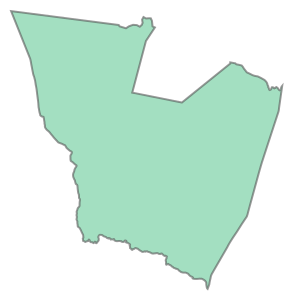

In [9]:
cordoba_sf.geometry[0] #areas individuales

In [10]:
cordoba_sf.geometry[0].area

235938945.8042021

In [11]:
cordoba_sf.head(1)

,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h,geometry
0,336422,141750202,246.0,211.0,457.0,155.0,248.0,151.0,"POLYGON ((3686668.391348725 6672098.301358264,..."


### Creamos un punto en Cordoba

Seguimos explorando la API, y obtenemos un punto de Cordoba

In [12]:
geolocator = Nominatim(user_agent="data_test") #creamos un nombre generico
location = geolocator.geocode("Santa Rosa 724, Alberdi, X5000 Córdoba, Argentina") #le pedimos la dirección de Cordoba

In [13]:
print(' Dirección: {} \n longitud: {} \n latitud: {}'.format(location.address,location.longitude, location.latitude))

 Dirección: 724, Santa Rosa, Alberdi, Córdoba, Departamento Capital, Cba., X5000, Argentina 
 longitud: -64.1925663346939 
 latitud: -31.4095332530612


Vemos que devuelve las coordenadas de la Cda(Cordoba), Argentina.

In [18]:
cordoba_point = Point(location.longitude, location.latitude)

### Creamos un mapa genérico de Cordoba

Utilizando un mapa vamos a verificar, donde quedó nuestro `cordoba_pint`

In [19]:
G = ox.graph_from_place('Cordoba, Argentina', network_type='drive')
ox.save_graph_shapefile(G, 'openstreetmap_argentina', folder='.')

C:\Users\USUARIO\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Users\USUARIO\Anaconda3\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [20]:
cordoba_map = geopandas.read_file("openstreetmap_argentina/edges/")

In [21]:
cordoba_map.head(3)

,access,area,bridge,from,highway,junction,key,landuse,lanes,length,maxspeed,name,oneway,osmid,ref,to,tunnel,width,geometry
0,None,None,None,1265861763,secondary,None,0,None,2,92.523,40,Avenida Donato Ãlvarez,False,31433522,RPE54,1762167789,None,None,"LINESTRING (-64.26227919999999 -31.3324652, -6..."
1,None,None,None,1762167793,residential,None,0,None,2,215.688,None,CÃ©sar Milone,False,164599754,None,1762167789,None,None,"LINESTRING (-64.2603022 -31.3342202, -64.26229..."
2,None,None,None,2464914795,secondary,None,0,None,2,87.792,40,Avenida Donato Ãlvarez,False,31433522,RPE54,1762167789,None,None,"LINESTRING (-64.2622952 -31.3340866, -64.26230..."


In [22]:
cordoba_point_geo = geopandas.GeoSeries(cordoba_point)

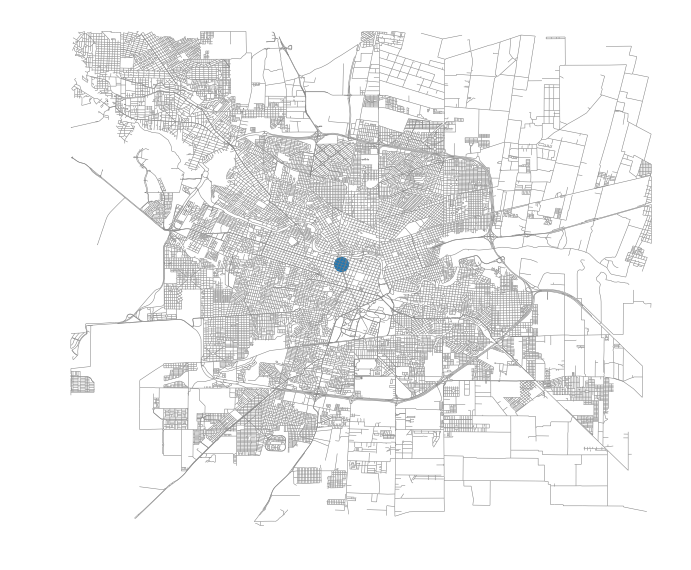

In [23]:
ax = cordoba_map.plot(linewidth=0.5, color='grey', figsize=(15, 10))
cordoba_point_geo.plot(ax=ax, markersize=200)
#ax.set(xlim=(2.25, 2.42), ylim=(48.815, 48.905));
ax.set_axis_off()